In [1]:
from astropy.table import Table
import matplotlib.pyplot as plt
%matplotlib inline
from desitarget import QA
import numpy as np
from scipy.interpolate import interp1d

In [2]:
bf = "../../data/brick-info-dr3.fits"
flucmap = QA.fluc_map(bf)
n_points = len(flucmap)
integrated = np.linspace(0.0,1.0, n_points)

ebv = flucmap['EBV'].copy()
ebv.sort()

depth_g = flucmap['DEPTH_G'].copy()
depth_g.sort()

depth_r = flucmap['DEPTH_R'].copy()
depth_r.sort()

depth_z = flucmap['DEPTH_Z'].copy()
depth_z.sort()


fraction_ebv = np.array([0.0, 0.02, 0.1, 0.3, 0.5, 0.8, 0.9, 0.97, 0.99, 1.0])
sample_ebv = np.int_(fraction_ebv * (n_points-1))

fraction_depth_g = np.array([0.0, 0.01, 0.02, 0.08, 0.2, 0.3, 0.4, 0.5, 0.7, 1.0])
sample_depth_g = np.int_(fraction_depth_g * (n_points-1))

fraction_depth_r = np.array([0.0, 0.01, 0.02, 0.08, 0.2, 0.3, 0.4, 0.5, 0.7, 1.0])
sample_depth_r = np.int_(fraction_depth_r * (n_points-1))

fraction_depth_z = np.array([0.0, 0.01, 0.03, 0.08, 0.2, 0.3, 0.7, 0.9, 0.99, 1.0])
sample_depth_z = np.int_(fraction_depth_z * (n_points-1))

print ebv[sample_ebv]
print depth_g[sample_depth_g]
print depth_r[sample_depth_r]
print depth_z[sample_depth_z]

[ 0.008758    0.01870997  0.02296527  0.02915531  0.03742408  0.05848215
  0.07245968  0.10044503  0.13744652  0.25484765]
[ 12.91721153  18.95317841  20.64332008  23.78604698  24.29093361
  24.4658947   24.55436325  24.61874771  24.73129845  24.94996071]
[ 12.91556168  18.6766777   20.29519463  23.41814804  23.85244179
  24.10131454  24.23338318  24.34066582  24.53495026  24.94865227]
[ 13.09378147  21.06531525  22.42395782  22.77471352  22.96237755
  23.04913139  23.43119431  23.69817734  24.1913662   24.92163849]


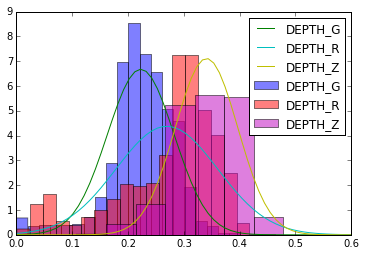

In [3]:
cols = ['DEPTH_G', 'DEPTH_R', 'DEPTH_Z']
for col in cols:
    diff = flucmap[col]-flucmap['GAL' + col]
    a = plt.hist(diff, bins=20, alpha=0.5, normed=True, label=col)
    plt.xlim([0.0, 0.6])
    mean_fluct = diff.mean()
    sigma_fluct = diff.std()
    x = np.linspace(0.0,1.0,100)
    plt.plot(x, np.exp(-(x - mean_fluct)**2/(2.0*sigma_fluct**2))/(np.sqrt(2.0*np.pi) * sigma_fluct),
            label=col)

plt.legend()

/usr/local/lib/python2.7/dist-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


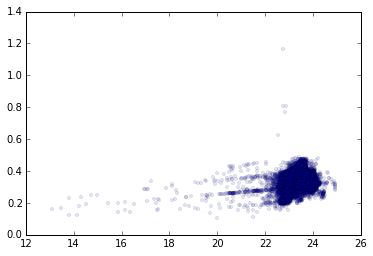

In [4]:
col = 'DEPTH_Z'
plt.scatter( flucmap[col], flucmap[col]-flucmap['GAL' + col], s=10, alpha=0.1)

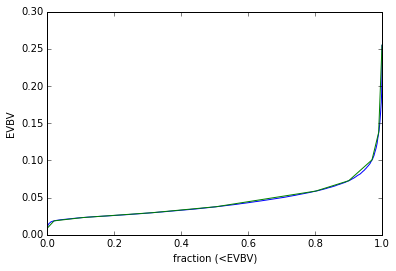

In [5]:
plt.plot(integrated, ebv)
f_ebv = interp1d(integrated[sample_ebv], ebv[sample_ebv])
plt.plot(integrated, f_ebv(integrated))
plt.xlabel('fraction (<EVBV)')
plt.ylabel('EVBV')

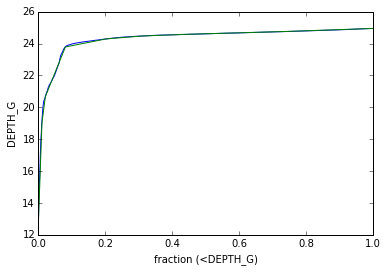

In [6]:
plt.plot(integrated, depth_g)
f_depth_g = interp1d(integrated[sample_depth_g], depth_g[sample_depth_g])
plt.plot(integrated, f_depth_g(integrated))
plt.xlabel('fraction (<DEPTH_G)')
plt.ylabel('DEPTH_G')

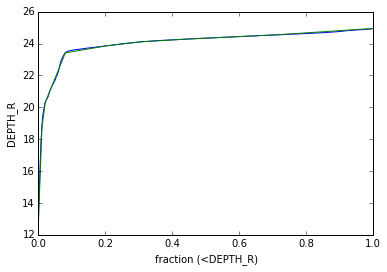

In [7]:
plt.plot(integrated, depth_r)
f_depth_r = interp1d(integrated[sample_depth_r], depth_r[sample_depth_r])
plt.plot(integrated, f_depth_r(integrated))
plt.xlabel('fraction (<DEPTH_R)')
plt.ylabel('DEPTH_R')

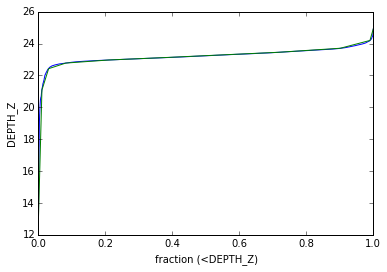

In [8]:
plt.plot(integrated, depth_z)
f_depth_z = interp1d(integrated[sample_depth_z], depth_z[sample_depth_z])
plt.plot(integrated, f_depth_z(integrated))
plt.xlabel('fraction (<DEPTH_Z)')
plt.ylabel('DEPTH_Z')

In [9]:
def sample_depths(n_to_generate):
    
    #mean and std deviation of the difference between DEPTH and GALDEPTH in the DR3 data.
    differences = {}
    differences['DEPTH_G'] = [0.22263251, 0.059752077]
    differences['DEPTH_R'] = [0.26939404, 0.091162138]
    differences['DEPTH_Z'] = [0.34058815, 0.056099825]
    
    # (points, fractions) provide interpolation to the integrated probability distributions from DR3 data
    
    points = {}
    points['EBV'] = np.array([ 0.008758,  0.01870997,  0.02296527,  0.02915531,  0.03742408,
                       0.05848215, 0.07245968,  0.10044503,  0.13744652,  0.25484765])
    points['DEPTH_G'] = np.array([ 12.91721153,  18.95317841,  20.64332008,  23.78604698,  24.29093361,
                  24.4658947,   24.55436325,  24.61874771,  24.73129845,  24.94996071])
    points['DEPTH_R'] = np.array([ 12.91556168,  18.6766777,   20.29519463,  23.41814804,  23.85244179,
                  24.10131454,  24.23338318,  24.34066582,  24.53495026,  24.94865227])
    points['DEPTH_Z'] = np.array([ 13.09378147,  21.06531525,  22.42395782,  22.77471352,  22.96237755,
                  23.04913139,  23.43119431,  23.69817734,  24.1913662,   24.92163849])

    fractions = {}
    fractions['EBV'] = np.array([0.0, 0.02, 0.1, 0.3, 0.5, 0.8, 0.9, 0.97, 0.99, 1.0])
    fractions['DEPTH_G'] = np.array([0.0, 0.01, 0.02, 0.08, 0.2, 0.3, 0.4, 0.5, 0.7, 1.0])
    fractions['DEPTH_R'] = np.array([0.0, 0.01, 0.02, 0.08, 0.2, 0.3, 0.4, 0.5, 0.7, 1.0])
    fractions['DEPTH_Z'] = np.array([0.0, 0.01, 0.03, 0.08, 0.2, 0.3, 0.7, 0.9, 0.99, 1.0])

    names = ['EBV', 'DEPTH_G', 'DEPTH_R', 'DEPTH_Z']
    functions = {}
    depths = {}
    for name in names:
        functions[name] = interp1d(fractions[name], points[name])
        fracs = np.random.random(n_to_generate)
        depths[name] = functions[name](fracs)
        if(name != 'EBV'):
            print(name)
            depth_minus_galdepth = np.random.normal(
                                    loc=differences[name][0], 
                                    scale=differences[name][1], size=n_to_generate)
            depth_minus_galdepth[depth_minus_galdepth<0] = 0.0
    
            depths['GAL'+name] = depths[name] - depth_minus_galdepth
    
    return depths

In [10]:
a = sample_depths(15000)

DEPTH_G
DEPTH_R
DEPTH_Z


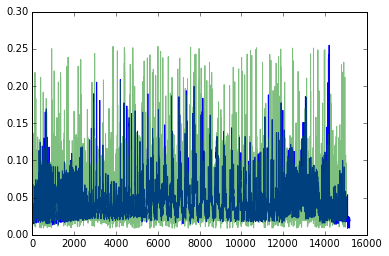

In [11]:
plt.plot(flucmap['EBV'])
plt.plot(a['EBV'], alpha=0.5)

0.135933333333
0.105093233182


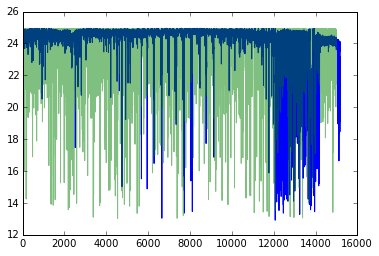

In [12]:
plt.plot(flucmap['DEPTH_G'])
plt.plot(a['DEPTH_G'], alpha=0.5)
print 1.0*len(a['DEPTH_G'][a['DEPTH_G'] < 24.0])/len(a['DEPTH_G'])
print 1.0*len(flucmap['DEPTH_G'][flucmap['DEPTH_G']<24.0])/len(flucmap['DEPTH_G'])

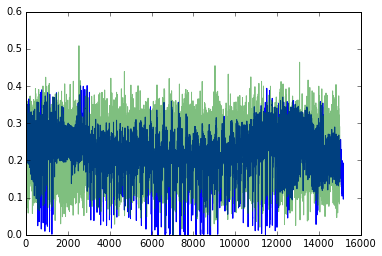

In [13]:
plt.plot(flucmap['DEPTH_G']-flucmap['GALDEPTH_G'])
plt.plot(a['DEPTH_G']-a['GALDEPTH_G'], alpha=0.5)

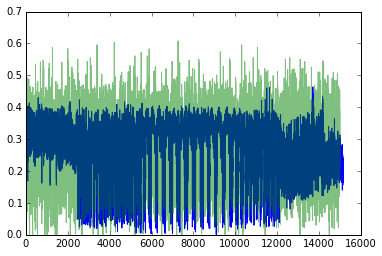

In [14]:
plt.plot(flucmap['DEPTH_R']-flucmap['GALDEPTH_R'])
plt.plot(a['DEPTH_R']-a['GALDEPTH_R'], alpha=0.5)

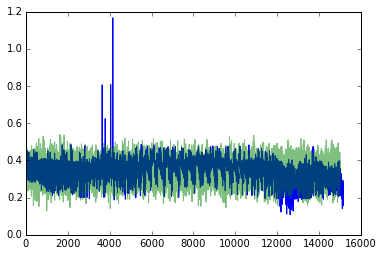

In [15]:
plt.plot(flucmap['DEPTH_Z']-flucmap['GALDEPTH_Z'])
plt.plot(a['DEPTH_Z']-a['GALDEPTH_Z'], alpha=0.5)